# Common Plots
The following examples show how to create some common visualizations of Madrigal data. Due to the 4D nature of the data, it is challenging to visualize all parts of the FoV simultaneously.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import madrigalWeb.madrigalWeb

In [2]:
madrigalUrl='http://cedar.openmadrigal.org'

data = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)

user_fullname = 'Student Example' 
user_email = 'isr.summer.school@gmail.com' 
user_affiliation= 'ISR Summer School 2024'
code = 61   # PFISR
year = 2024
month = 1
day = 8
hour1 = 7 
minute1 = 1
hour2 = 13
# list of experiments inside a time period of a day
expList = data.getExperiments(code,year,month,day,hour1,minute1,0,year,month,day,hour2,0,0)
for exp in expList:
    print(str(exp))

id: 100011616
realUrl: https://cedar.openmadrigal.org/showExperiment/?experiment_list=100011616
url: https://cedar.openmadrigal.org/madtoc/experiments4/2024/pfa/08jan24a
name: Themis36 - Auroral and convection measurements
siteid: 10
sitename: CEDAR
instcode: 61
instname: Poker Flat IS Radar
startyear: 2024
startmonth: 1
startday: 8
starthour: 7
startmin: 1
startsec: 4
endyear: 2024
endmonth: 1
endday: 8
endhour: 18
endmin: 0
endsec: 0
isLocal: True
madrigalUrl: http://https://cedar.openmadrigal.org/
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1735095302
access: 2
Madrigal version: 3.0



In [3]:
fileList = data.getExperimentFiles(expList[0].id)
for file0 in fileList:
    print(os.path.basename(file0.name),'\t', file0.kindat, '\t',file0.kindatdesc)

pfa20240108.001_ac_nenotr_01min.001.h5 	 1000201 	 None
pfa20240108.001_ac_fit_01min.001.h5 	 2000201 	 None
pfa20240108.001_ac_nenotr_03min.001.h5 	 1000203 	 None
pfa20240108.001_ac_fit_03min.001.h5 	 2000203 	 None
pfa20240108.001_ac_nenotr_05min.001.h5 	 1000205 	 None
pfa20240108.001_ac_fit_05min.001.h5 	 2000205 	 None
pfa20240108.001_ac_nenotr_10min.001.h5 	 1000210 	 None
pfa20240108.001_ac_fit_10min.001.h5 	 2000210 	 None
pfa20240108.001_ac_nenotr_15min.001.h5 	 1000215 	 None
pfa20240108.001_ac_fit_15min.001.h5 	 2000215 	 None
pfa20240108.001_ac_nenotr_20min.001.h5 	 1000220 	 None
pfa20240108.001_ac_fit_20min.001.h5 	 2000220 	 None
pfa20240108.001_lp_nenotr_01min.001.h5 	 1000101 	 None
pfa20240108.001_lp_fit_01min.001.h5 	 2000101 	 None
pfa20240108.001_lp_nenotr_03min.001.h5 	 1000103 	 None
pfa20240108.001_lp_fit_03min.001.h5 	 2000103 	 None
pfa20240108.001_lp_nenotr_05min.001.h5 	 1000105 	 None
pfa20240108.001_lp_fit_05min.001.h5 	 2000105 	 None
pfa20240108.001_lp_

In [6]:
# Download the file that we need to run these examples
os.makedirs('../data', exist_ok=True)
filepath= '../data/pfa20240108.001_lp_fit_01min.001.h5 '

if not os.path.exists(filepath):

    fileList = data.getExperimentFiles(expList[0].id)
    for file0 in fileList:
        if file0.kindatdesc == 'Fitted - Long Pulse (F-region) - 1 min':
            file2download = file0.name
            break
        
    print('Downloading data file...')

    file = data.downloadFile(file2download, filepath, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')

else:
    print(f"File {filepath} already downloaded")
    

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


NameError: name 'file2download' is not defined

## RTI Plot
Range-Time-Intensity (RTI) plots are a common way to look at how profiles of a parameter change in time.

### The Most Basic

In [7]:
with h5py.File(filepath, 'r') as h5:
    bidx = 'Array with beamid=63149 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

time = utime.astype('datetime64[s]')
fig = plt.figure(figsize=(10,5))
plt.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../data/pfa20240108.001_lp_fit_01min.001.h5 ', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### A Scientifically Useful Plot
Now lets create the same plot as before but with intelligible axes and labels, a colorbar, ect.  This is probably the minimum you want to do for inclusion in a paper or presentation.

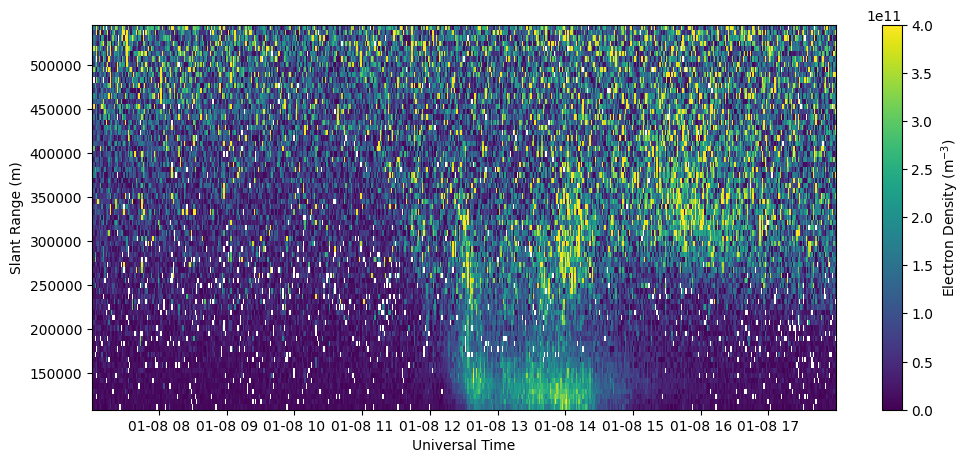

In [14]:
with h5py.File(filepath, 'r') as h5:
    bidx = 'Array with beamid=63149 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

### Plotting a Specific Beam
Plot a specific beam by selecting the beam index (`bidx`) more carefully.  You can either select a particular beam by its beamcode, or choose a beam based on proximity to a particular azimuth/elevation (i.e., choose the highest elevation beam in the beam pattern).

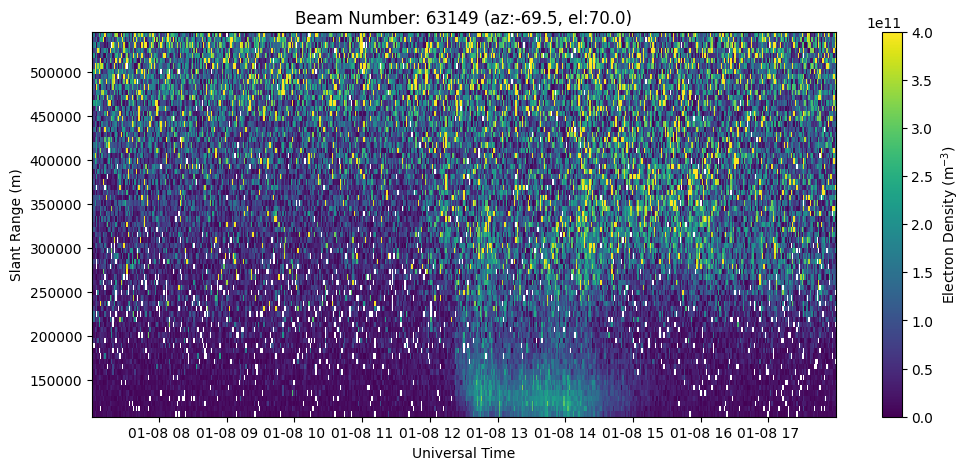

In [15]:
# Plot beam 64157
with h5py.File(filepath, 'r') as h5:
    beamcodes = np.array(h5['Data/Array Layout'])
    bidx = 'Array with beamid=64157 '
    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])
    
    azm = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['azm'][0]
    elm = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['elm'][0]
    beamid = h5['Data/Array Layout']['Array with beamid=63149 ']['1D Parameters']['beamid'][0]

time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng[np.isfinite(rng)], ne[:,np.isfinite(rng)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamid, azm, elm))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

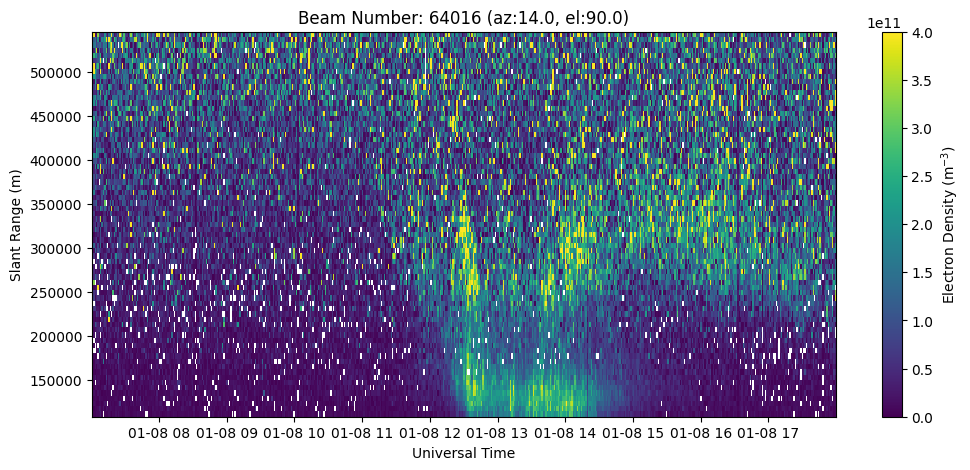

In [16]:
# Plot the highest elevation beam (vertical in this case)
with h5py.File(filepath, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

    azm = h5['Data/Array Layout'][bidx]['1D Parameters']['azm'][0]
    elm = h5['Data/Array Layout'][bidx]['1D Parameters']['elm'][0]
    beamid = h5['Data/Array Layout'][bidx]['1D Parameters']['beamid'][0]


time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng, ne.T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamid, azm, elm))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

## Beam Position Plot
Create a polar plot of all beam positions for this particular experiment.

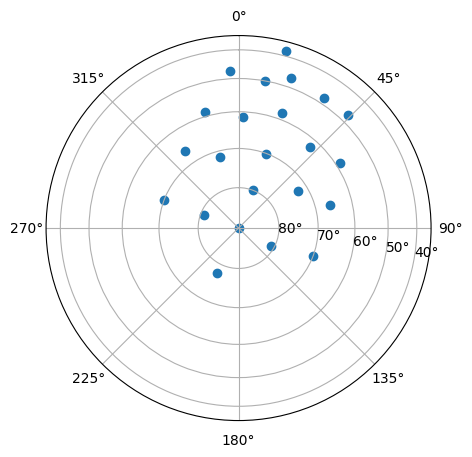

In [17]:
with h5py.File(filepath, 'r') as h5:
    el = []
    az = []
    for key in h5['Data/Array Layout'].keys():
        el.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        az.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['azm'][0]))
    el = np.array(el)
    az = np.array(az)

# set up plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
ax.set_rlabel_position(100.)
elticks = np.arange(20., 90., 10.)
ax.set_rticks(np.cos(elticks*np.pi/180.))
ax.set_yticklabels([str(int(el))+u'\N{DEGREE SIGN}' for el in elticks])

ax.scatter(az*np.pi/180., np.cos(el*np.pi/180.))